# RGB tile draw issue

This is my attempt to reproduce / debug the RGB tile draw issue Adeel mentioned.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
from astropy.coordinates import SkyCoord
from hips.utils import WCSGeometry
from hips import HipsSurveyProperties, HipsTile, HipsTileMeta, SimpleTilePainter

In [11]:
geometry = WCSGeometry.create_simple(
     skydir=SkyCoord(0, 0, unit='deg', frame='galactic'),
     width=1000, height=500, fov="5 deg",
     coordsys='galactic', projection='AIT'
)

In [12]:
url = 'http://alasky.unistra.fr/DSS/DSS2Merged/properties'
hips_survey = HipsSurveyProperties.fetch(url)

(512, 512)

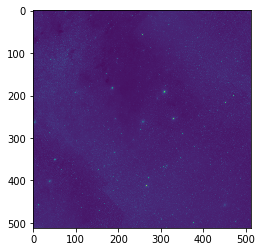

In [13]:
tile_meta = HipsTileMeta(order=3, ipix=450, file_format='fits')
url = 'http://alasky.unistra.fr/DSS/DSS2Merged/Norder3/Dir0/Npix463.fits'
tile = HipsTile.fetch(meta=tile_meta, url=url)
plt.imshow(tile.data)
tile.data.shape

In [14]:
painter = SimpleTilePainter(geometry, hips_survey, 'jpg')
painter.run()

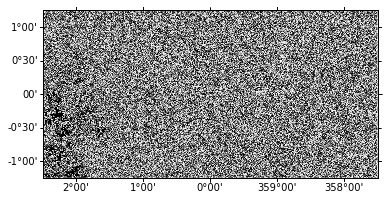

In [15]:
from astropy.visualization.mpl_normalize import simple_norm
ax = plt.subplot(projection=geometry.wcs)
norm = simple_norm(painter.image, 'asinh')
ax.imshow(painter.image, origin='lower', norm=norm, cmap='gray')

In [16]:
painter.tile_indices

array([7201, 7203, 7204, 7205, 7206, 7207, 7209, 7212, 7213, 7218, 7224])

In [19]:
next(painter.tiles)

StopIteration: 